### Note:
Note this dataset has enjoyed uncountable analysis but I started with it because: 
- it is beginner friendly
- to test my understanding of descriptive statistics after going through [makemeanalyst]("https://makemeanalyst.com/basic-statistics-for-data-analysis")

# Titanic Analysis

#### Problem statement

- Number of travelers on board the titanic
- Number of men and women onboard the titanic
- Comparison of the number of men and women who lost their lives
- Age wise analysis of the victims
- Number of people who embarked at each port

Dataset Description

**Overview**

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**Data Dictionary**
|Variable	|Definition	|Key|
|-----------|-----------|------|
|survival	|Survival	|0 = No, 1 = Yes|
|pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex	||
|Age	|Age in years	||
|sibsp	|# of siblings / spouses aboard the Titanic	||
|parch	|# of parents / children aboard the Titanic	||
|ticket	|Ticket number	||
|fare	|Passenger fare	||
|cabin	|Cabin number	||
|embarked|	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton||

**Variable Notes**

**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)


**parch:** The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
from scipy import stats


## Step : Acquire (Explore Problem, identify data and [download and ] import data)

In [2]:
# Acquire dataset
# import datasets and assign them to variables train_df
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')




## Step 2 : Prepare(Explore data, visualize ideas, and clean data)

#### Data Preprocessing

In [109]:
# Data Preparation
# dataframe inspection, i check the first 5 datapoints to have an idea what they look like
# this is like a familiarisation check
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [110]:
# similarly, I check the 5 last data points in the dataset, still a familiarisation check.
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# descriptive statistics
# before now, I have always asked myself, why describe dataset and how do I figure out or suspect 
# outliers here? 
# I am going to illustrate the importance using PassengerId whichi is or at least should be serial, hence
# normal distribution. 
# We start from the mean, which is the 50
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Data Cleaning

In [6]:
# check null dataset
print(f" Number of null entries : {train_df.isnull().any().sum()}")

 Number of null entries : 3


In [7]:
# dataset shape
train_df.shape

(891, 12)

In [8]:
train_df.dropna(inplace=True, axis = 0)

In [9]:
# confirm null entries dropped
print(f"Number of null entries : {train_df.isnull().any().sum()}")

Number of null entries : 0


In [10]:
# dataset information 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


#### **Exploratory Data Analysis**

**Univariate Analysis** 

Time to check the features individually and see their distributions

In [11]:
bar_values = train_df['Survived'].value_counts()
position = np.arange(len(bar_values))
xticks = ['# Died', '# Survived']

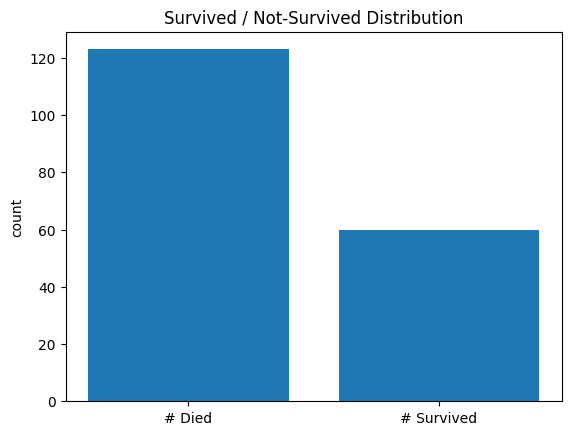

In [12]:
plt.bar(position, bar_values)
plt.title("Survived / Not-Survived Distribution")
plt.ylabel("count")
plt.xticks(position, xticks)
plt.show()

In [101]:
survived = train_df[(train_df['Survived'] == 1)].groupby(['Sex'])

print(f"Of those that survived, {round(survived['Sex'].count()['female'] / (survived['Sex'].count().sum()),2)}% are female.")
print(f"while the remaining {round(survived['Sex'].count()['male'] / survived['Sex'].count().sum(), 2)} % are male")

Of those that survived, 0.67% are female.
while the remaining 0.33 % are male


In [107]:
survived['Pclass'].value_counts(normalize=1)

Sex     Pclass
female  1         0.865854
        2         0.097561
        3         0.036585
male    1         0.853659
        2         0.097561
        3         0.048780
Name: proportion, dtype: float64

In [14]:
plot_value = train_df['Pclass'].value_counts()
position = np.arange(len(plot_value))
xticks = ['First Class', 'Second Class', 'Third Class']

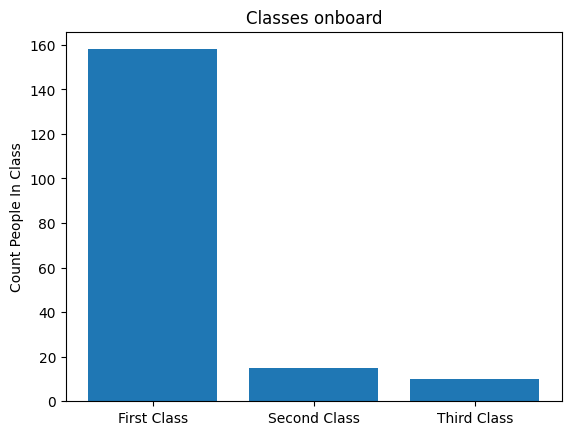

In [15]:
plt.bar(position, plot_value)
plt.title("Classes onboard")
plt.ylabel("Count People In Class")
plt.xticks(position, xticks)
plt.show();

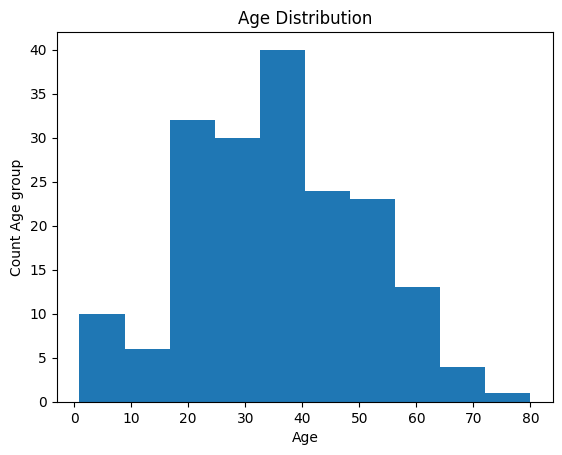

In [16]:
train_df['Age'].plot(kind='hist')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count Age group")
plt.show();

In [17]:
plot_data = train_df['SibSp'].value_counts()
position = np.arange(len(plot_data))
xticks = ['No Siblings', 'One Sibling', 'Two Siblings', 'Three Sibling']

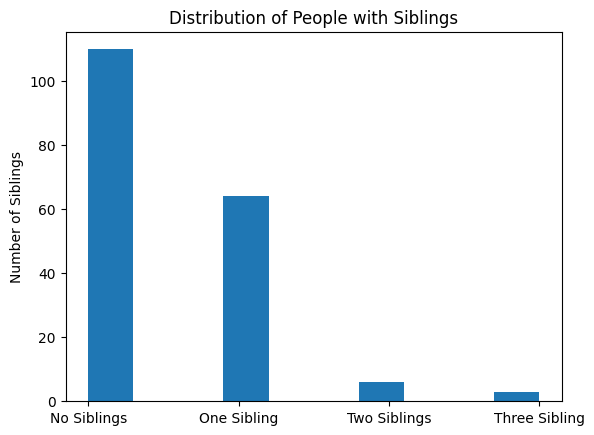

In [18]:
train_df['SibSp'].plot(kind='hist')
plt.xticks(position, xticks)
plt.title("Distribution of People with Siblings")
# plt.xlabel("Siblings")
plt.ylabel("Number of Siblings")
plt.show();

**Bivariate Analysis** 

Insightful investigation of two variables.

In [19]:
pd.crosstab(train_df['Survived'], train_df['Pclass'])

Pclass,1,2,3
Survived,,,
0,52,3,5
1,106,12,5


In [20]:
# Correlation Coefficient using Pearson's R function
coeff_value, p_value = stats.pearsonr(train_df['Pclass'], train_df['Survived'])
print(f"The Pearsons Correlation Coefficient is {round(coeff_value, 2)}, hence there is no relation between the two")
print(f"The z - score is {round(p_value, 2)}")

The Pearsons Correlation Coefficient is -0.03, hence there is no relation between the two
The z - score is 0.64


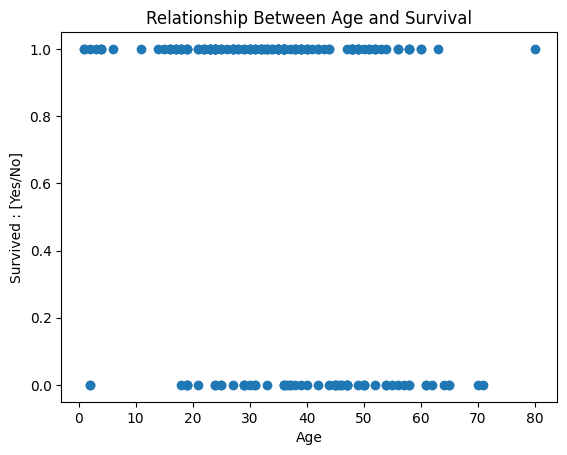

In [21]:
plt.scatter(train_df['Age'], train_df['Survived'])
plt.title("Relationship Between Age and Survival")
plt.xlabel("Age")
plt.ylabel("Survived : [Yes/No]")

plt.show();

#### **Visualization**

In [22]:
bar_values = train_df['Survived'].value_counts()
position = np.arange(len(bar_values))
xticks = ['# Died', '# Survived']

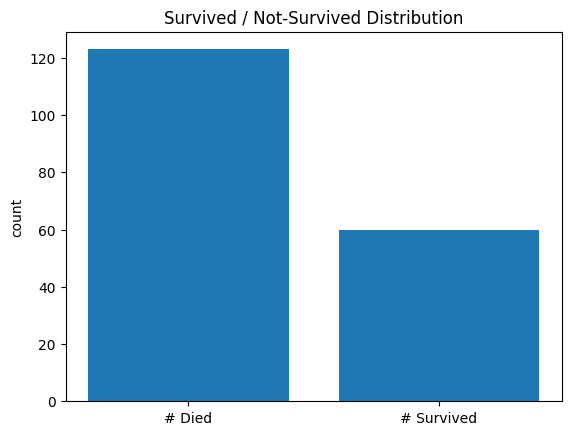

In [23]:
# 2 / 3 (two-third) of the people onboard of the Titanic died
plt.bar(position, bar_values)
plt.title("Survived / Not-Survived Distribution")
plt.ylabel("count")
plt.xticks(position, xticks)
plt.show()

In [24]:
plot_value = train_df['Pclass'].value_counts()
position = np.arange(len(plot_value))
xticks = ['First Class', 'Second Class', 'Third Class']

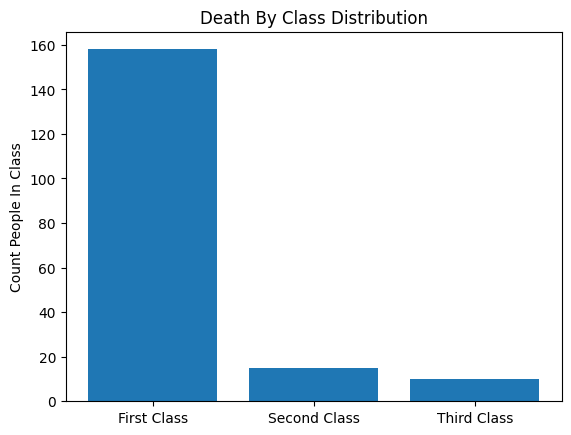

In [25]:
plt.bar(position, plot_value)
plt.title("Death By Class Distribution")
plt.ylabel("Count People In Class")
plt.xticks(position, xticks)
plt.show();

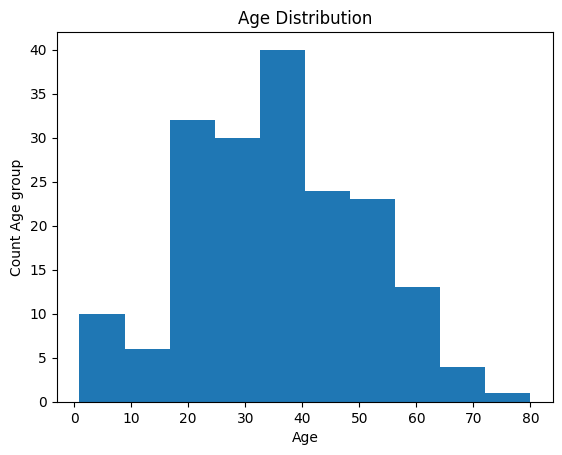

In [26]:
# Majority of travellers were in their 30 - 40 years of age
train_df['Age'].plot(kind='hist')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count Age group")
plt.show();

## Step 4 **Report**

- One-third of the total population survived. 
- Out of this survivors, 67% are female while 33% are male.
- About 70% of recorded death are from the first class.

### Recommendation
More research should be conducted why most of the death came from first class. 
- Were they not used to life threatening events? 
- Were they more scared or hyper tensive or just what?